## Assignment 3, Modeling Disease Spread on Networks

---

#### Subproblem 1.

$$
G = \begin{pmatrix}
a_{11} & a_{12} & a_{13} & a_{14} & a_{15} & a_{16} \\
a_{21} & a_{22} & a_{23} & a_{24} & a_{25} & a_{26} \\
a_{31} & a_{32} & a_{33} & a_{34} & a_{35} & a_{36} \\
a_{41} & a_{42} & a_{43} & a_{44} & a_{45} & a_{46} \\
a_{51} & a_{52} & a_{53} & a_{54} & a_{55} & a_{56} \\
a_{61} & a_{62} & a_{63} & a_{64} & a_{65} & a_{66} \\
\end{pmatrix}
$$

Since the graph doesn't show the line point back to the region itself, I assume the diagonal line $a_{11}, a_{22}, ... a_{66}$ don't have the reflexivity.

In [4]:
import numpy as np

In [3]:
A = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 1, 0, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 1, 0],
])

---
#### Subproblem 2.

What is the expression for the $k$-step transformation $T_k$ in terms of the one-step matrix $U$? Explain briefly why this expression is correct.

It can be expressed as: 

$
x_k = U^k x_0
$

Since we start with $x_0$, day $k$ which greater then 0, can be express as one step function as below without iteration. The reason is that, the value we want to get from the expression $T_{k}(x_{k-1})$, can always be display as $U$ to the power of k, starting from day 0.


$
x_1 = T_1(x_0) = U x_0
$

$
x_2 = T_2(x_1) = U(U x_0) = U^2 x_0
$

$
x_3 = T_3(x_2) = U(U(U x_0)) = U^3 x_0
$

$
x_k = T_k(x_{k-1}) = U^k x_0
$

---
#### Subproblem 3.


1.The matrix $U$ base on $β = 0.05$ and $γ = 0.125$ can be express as,

$$
\mathbf{U} = (1 - 0.125)\mathbf{I} + 0.05\,\mathbf{A}
$$

$T_1(x_0)  =  U x_0 $

In [14]:
x_0 = np.array([1,0,0,0,0,0]).T
I = np.eye(6)
U = (1-0.125)*I + 0.05*A

T_1 = U @ x_0
print(T_1)

[0.875 0.05  0.05  0.    0.    0.   ]


$T_{25}(x_0)  =  U^{25} x_0 $

In [15]:
U25 = np.linalg.matrix_power(U, 25)

T_25 = U25 @ x_0
print(T_25)

[0.20880225 0.233854   0.233854   0.14779924 0.14779924 0.08278419]


$T_{50}(x_0)  =  U^{50} x_0 $

In [ ]:
U50 = np.linalg.matrix_power(U, 50)

T_50 = U50 @ x_0
print(T_50)

[0.20351622 0.26778856 0.26778856 0.24609965 0.24609965 0.17282482]


2.Find the $β$ that makes the infection intensity switch. 

I assume we need more days to proper inspect the infection, thus, I take 50 days to hold one of the variables in our calculation. After that, build a function to test how different $β$ from 0.01~0.1 affect the infection. 

Eventually, we get the $β$ that make the total infection greater then the sum of day 0 (day 0 will be 1). And after this specific $β$, the value of the infection on day 50, will only go upward.

The $β$: 0.04750000000000034 

The infection intensity on day 50 with this $β$: 1.0006875603520446 


In [44]:
b = 0.01
holder = 0
result = {}
starting_day = x_0.sum()
reporter = True

while b <= 0.1:
    U = (1-0.125)*I + b*A
    U50 = np.linalg.matrix_power(U, 50)
    T_50 = float((U50 @ x_0).sum())
    result[b] = T_50

    if reporter and T_50 > starting_day:
        print("The T_50:",T_50, "\nThe b:", b, "\nWe got him.")
        reporter = False

    holder = T_50
    b+= 0.0001

# print(result)

The T_50: 1.0006875603520446 
The b: 0.04750000000000034 
We got him.


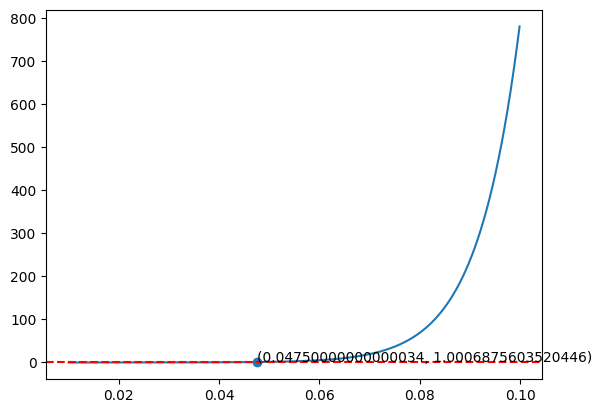

In [51]:
import matplotlib.pyplot as plt

plt.plot(result.keys(), result.values())
plt.axhline(y=1, linestyle='--', color='red')

x_point = 0.04750000000000034
y_point = 1.0006875603520446 
plt.scatter(x_point, y_point) 
plt.text(x_point, y_point, f"({x_point}, {y_point})")

plt.show()